# WordToVec tutorial

+ Take a 3 layer neural network. (1 input layer + 1 hidden layer + 1 output layer)
+ Feed it a word and train it to predict its neighbouring word.
+ Remove the last (output layer) and keep the input and hidden layer.
+ Now, input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the input word.




In [1]:
import numpy as np
import tensorflow as tf

corpus_raw = "He is the king . The king is royal . She is the royal  queen "
#corpus_raw = "The quick brown fox runs over the lazy dog"
corpus = corpus_raw.lower()

In [2]:
words = []
for i in corpus.split():
    if( i != '.' ):
        words.append(i)
words = set(words)
word2int = {}
int2word = {}
vocab_size = len(words)

for i,word in enumerate(words):
    #print(i,word)
    word2int[word] = i 
    int2word[i] = word


In [3]:
print(int2word[0])

queen


In [4]:
raw_sentences = corpus.split(".")
sentences = []
for i in raw_sentences:
    sentences.append(i.split())
print(sentences)


[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [5]:
data = []
WINDOW_SZ = 2
for i in sentences:
    for idx, word in enumerate(i):
        for nb_word in i[max(idx - WINDOW_SZ, 0) : min(idx + WINDOW_SZ, len(i)) + 1]:
            if (nb_word != word):
                data.append([word, nb_word])
                #print("  ",[word, nb_word])

In [6]:
print(len(data))
data

34


[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [7]:
def to_one_hot(data_point_idx, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_idx] = 1
    return temp

x_train = []
y_train = []

for i in data:
    x_train.append(to_one_hot(word2int[i[0]],vocab_size))
    y_train.append(to_one_hot(word2int[i[1]],vocab_size))
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
#print(x_train)
print(x_train.shape,y_train.shape)

(34, 7) (34, 7)


In [8]:
x = tf.placeholder(tf.float32,shape=[None,vocab_size])
y_label = tf.placeholder(tf.float32, shape=[None,vocab_size])

In [9]:
EMBEDDING_DIM = 5

W1 = tf.Variable(tf.random_normal([vocab_size,EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
hidden_representation = tf.add(tf.matmul(x,W1),b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM,vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation,W2),b2))


In [10]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [11]:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label*tf.log(prediction),reduction_indices=[1]))


In [12]:
train_step = tf.train.GradientDescentOptimizer(.1).minimize(cross_entropy_loss)
n_iters = 10000
for _ in range(n_iters):
    a, b = sess.run([train_step, cross_entropy_loss],feed_dict={x:x_train,y_label:y_train})
    print("loss is : ",b)

loss is :  3.25171
loss is :  3.00444
loss is :  2.81832
loss is :  2.67651
loss is :  2.56496
loss is :  2.47387
loss is :  2.39702
loss is :  2.33062
loss is :  2.27229
loss is :  2.2205
loss is :  2.17414
loss is :  2.13242
loss is :  2.09469
loss is :  2.06046
loss is :  2.02929
loss is :  2.00083
loss is :  1.97476
loss is :  1.9508
loss is :  1.92874
loss is :  1.90835
loss is :  1.88947
loss is :  1.87192
loss is :  1.85558
loss is :  1.84031
loss is :  1.82601
loss is :  1.81258
loss is :  1.79995
loss is :  1.78803
loss is :  1.77677
loss is :  1.76611
loss is :  1.75599
loss is :  1.74637
loss is :  1.73721
loss is :  1.72848
loss is :  1.72014
loss is :  1.71217
loss is :  1.70454
loss is :  1.69723
loss is :  1.69021
loss is :  1.68347
loss is :  1.67699
loss is :  1.67075
loss is :  1.66473
loss is :  1.65894
loss is :  1.65334
loss is :  1.64794
loss is :  1.64271
loss is :  1.63765
loss is :  1.63276
loss is :  1.62802
loss is :  1.62342
loss is :  1.61896
loss is :  1.6

loss is :  1.35145
loss is :  1.35135
loss is :  1.35125
loss is :  1.35115
loss is :  1.35105
loss is :  1.35096
loss is :  1.35086
loss is :  1.35076
loss is :  1.35067
loss is :  1.35057
loss is :  1.35048
loss is :  1.35039
loss is :  1.35029
loss is :  1.3502
loss is :  1.35011
loss is :  1.35001
loss is :  1.34992
loss is :  1.34983
loss is :  1.34974
loss is :  1.34965
loss is :  1.34956
loss is :  1.34947
loss is :  1.34938
loss is :  1.34929
loss is :  1.3492
loss is :  1.34911
loss is :  1.34903
loss is :  1.34894
loss is :  1.34885
loss is :  1.34877
loss is :  1.34868
loss is :  1.3486
loss is :  1.34851
loss is :  1.34843
loss is :  1.34834
loss is :  1.34826
loss is :  1.34817
loss is :  1.34809
loss is :  1.34801
loss is :  1.34793
loss is :  1.34785
loss is :  1.34776
loss is :  1.34768
loss is :  1.3476
loss is :  1.34752
loss is :  1.34744
loss is :  1.34736
loss is :  1.34728
loss is :  1.34721
loss is :  1.34713
loss is :  1.34705
loss is :  1.34697
loss is :  1.346

loss is :  1.33164
loss is :  1.33162
loss is :  1.3316
loss is :  1.33158
loss is :  1.33156
loss is :  1.33155
loss is :  1.33153
loss is :  1.33151
loss is :  1.33149
loss is :  1.33147
loss is :  1.33146
loss is :  1.33144
loss is :  1.33142
loss is :  1.3314
loss is :  1.33139
loss is :  1.33137
loss is :  1.33135
loss is :  1.33133
loss is :  1.33132
loss is :  1.3313
loss is :  1.33128
loss is :  1.33126
loss is :  1.33125
loss is :  1.33123
loss is :  1.33121
loss is :  1.3312
loss is :  1.33118
loss is :  1.33116
loss is :  1.33115
loss is :  1.33113
loss is :  1.33111
loss is :  1.33109
loss is :  1.33108
loss is :  1.33106
loss is :  1.33104
loss is :  1.33103
loss is :  1.33101
loss is :  1.331
loss is :  1.33098
loss is :  1.33096
loss is :  1.33095
loss is :  1.33093
loss is :  1.33091
loss is :  1.3309
loss is :  1.33088
loss is :  1.33086
loss is :  1.33085
loss is :  1.33083
loss is :  1.33082
loss is :  1.3308
loss is :  1.33078
loss is :  1.33077
loss is :  1.33075
l

loss is :  1.32564
loss is :  1.32564
loss is :  1.32564
loss is :  1.32563
loss is :  1.32563
loss is :  1.32562
loss is :  1.32562
loss is :  1.32561
loss is :  1.32561
loss is :  1.3256
loss is :  1.3256
loss is :  1.32559
loss is :  1.32559
loss is :  1.32558
loss is :  1.32558
loss is :  1.32557
loss is :  1.32557
loss is :  1.32557
loss is :  1.32556
loss is :  1.32556
loss is :  1.32555
loss is :  1.32555
loss is :  1.32554
loss is :  1.32554
loss is :  1.32553
loss is :  1.32553
loss is :  1.32552
loss is :  1.32552
loss is :  1.32552
loss is :  1.32551
loss is :  1.32551
loss is :  1.3255
loss is :  1.3255
loss is :  1.32549
loss is :  1.32549
loss is :  1.32548
loss is :  1.32548
loss is :  1.32547
loss is :  1.32547
loss is :  1.32547
loss is :  1.32546
loss is :  1.32546
loss is :  1.32545
loss is :  1.32545
loss is :  1.32544
loss is :  1.32544
loss is :  1.32543
loss is :  1.32543
loss is :  1.32543
loss is :  1.32542
loss is :  1.32542
loss is :  1.32541
loss is :  1.325

loss is :  1.32411
loss is :  1.32411
loss is :  1.3241
loss is :  1.3241
loss is :  1.3241
loss is :  1.3241
loss is :  1.32409
loss is :  1.32409
loss is :  1.32409
loss is :  1.32409
loss is :  1.32408
loss is :  1.32408
loss is :  1.32408
loss is :  1.32408
loss is :  1.32407
loss is :  1.32407
loss is :  1.32407
loss is :  1.32407
loss is :  1.32406
loss is :  1.32406
loss is :  1.32406
loss is :  1.32406
loss is :  1.32405
loss is :  1.32405
loss is :  1.32405
loss is :  1.32405
loss is :  1.32404
loss is :  1.32404
loss is :  1.32404
loss is :  1.32404
loss is :  1.32403
loss is :  1.32403
loss is :  1.32403
loss is :  1.32403
loss is :  1.32402
loss is :  1.32402
loss is :  1.32402
loss is :  1.32402
loss is :  1.32401
loss is :  1.32401
loss is :  1.32401
loss is :  1.32401
loss is :  1.324
loss is :  1.324
loss is :  1.324
loss is :  1.324
loss is :  1.32399
loss is :  1.32399
loss is :  1.32399
loss is :  1.32399
loss is :  1.32398
loss is :  1.32398
loss is :  1.32398
loss 

loss is :  1.3232
loss is :  1.3232
loss is :  1.32319
loss is :  1.32319
loss is :  1.32319
loss is :  1.32319
loss is :  1.32319
loss is :  1.32319
loss is :  1.32318
loss is :  1.32318
loss is :  1.32318
loss is :  1.32318
loss is :  1.32318
loss is :  1.32318
loss is :  1.32318
loss is :  1.32317
loss is :  1.32317
loss is :  1.32317
loss is :  1.32317
loss is :  1.32317
loss is :  1.32317
loss is :  1.32317
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32312
loss is :  1.32312
loss is :  1.32312
loss is :  1.3

loss is :  1.32245
loss is :  1.32245
loss is :  1.32245
loss is :  1.32245
loss is :  1.32245
loss is :  1.32245
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32244
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32243
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32242
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1.32241
loss is :  1

loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.32211
loss is :  1.3221
loss is :  1.3221
loss is :  1.3221
loss is :  1.3221
loss is :  1.3221
loss is :  1.3221
loss is :  1.3221
loss is :  1.3221
loss is :  1.3221
lo

loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32189
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1

loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.32161
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.3216
loss is :  1.32

loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32148
loss is :  1.32147
loss is :  1

loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1

loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1.32125
loss is :  1

loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1.32118
loss is :  1

loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1.32109
loss is :  1

loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32105
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1.32104
loss is :  1

loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is :  1.321
loss is : 

loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1

loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1.32092
loss is :  1

loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1

In [13]:
print(sess.run(W1))
print(sess.run(b1))

[[-0.28158697  0.13675258 -1.02259541  0.52877027  1.70183372]
 [ 0.78582573  0.15409157 -1.04550946 -1.22632456  0.49918097]
 [-1.542243    0.91124505  0.90413117 -1.01526475 -1.67840552]
 [-0.01328205  1.21858454 -1.97012544 -0.56737918 -0.77442205]
 [-0.30338374  1.15758646 -1.07049739  0.43769586 -1.00708175]
 [ 1.82007134  0.34898475  2.63128185  1.55010235 -0.05147584]
 [-0.79907507 -3.47392821  0.55918133  0.3321825  -0.25252473]]
[ 0.06421509  0.0279927  -0.87473929  0.62679917  0.06909166]


In [14]:
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.21737188  0.16474527 -1.89733469  1.15556943  1.7709254 ]
 [ 0.85004079  0.18208426 -1.92024875 -0.59952539  0.56827265]
 [-1.47802794  0.93923777  0.02939188 -0.38846558 -1.60931385]
 [ 0.05093304  1.24657726 -2.84486485  0.05941999 -0.70533037]
 [-0.23916864  1.18557918 -1.94523668  1.06449509 -0.93799007]
 [ 1.8842864   0.37697744  1.75654256  2.17690158  0.01761582]
 [-0.73485994 -3.44593549 -0.31555796  0.95898163 -0.18343309]]


In [15]:
def euclid_distance( vec1 , vec2 ):
    return np.sqrt(np.sum((vec1-vec2)**2))

In [16]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = 0
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [17]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
new_vectors = model.fit_transform(vectors)

In [18]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors,'12')

queen 0.0577227
king 0.0804279
royal 0.389715
he 0.391263
she 0.440018
the 0.111081
is -0.939001


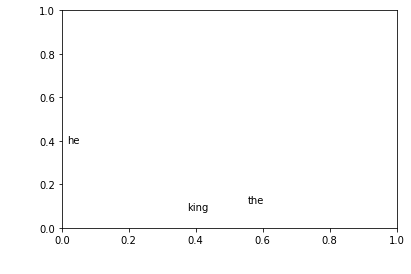

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

In [21]:
import datetime
datetime.datetime.now()

datetime.datetime(2017, 10, 16, 17, 25, 31, 362020)